In [1]:
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import LinearRegression
import pandas as pd
import os
from misc.utils import MyUtils

In [13]:
# training config
max_degree = 3
epochs_list = [1000, 10_000, 100_000]
eta_list = [0.01, 0.001, 0.0001]
lam_list = [1] # TODO: implement this

# dataset config
normalize_neg1_pos1 = False
normalize_zero_one = True
num_samples = None # set to None for all samples

### Pre-Process Our Dataset

In [17]:
data_path = "./prog4/code_linear_regression/houseprice"

X_train = pd.read_csv(os.path.join(data_path, "x_train.csv")).to_numpy()[:num_samples]
y_train = pd.read_csv(os.path.join(data_path, "y_train.csv")).to_numpy()[:num_samples]
X_test = pd.read_csv(os.path.join(data_path, "x_test.csv")).to_numpy()
y_test = pd.read_csv(os.path.join(data_path, "y_test.csv")).to_numpy()

if normalize_neg1_pos1:
    X_train = MyUtils.normalize_neg1_pos1(X_train)
    y_train = MyUtils.normalize_neg1_pos1(y_train)
    X_test = MyUtils.normalize_neg1_pos1(X_test)
    y_test = MyUtils.normalize_neg1_pos1(y_test)
    
elif normalize_zero_one:
    X_train = MyUtils.normalize_0_1(X_train)
    y_train = MyUtils.normalize_0_1(y_train)
    X_test = MyUtils.normalize_0_1(X_test)
    y_test = MyUtils.normalize_0_1(y_test)

### Run Metric Calculations

In [18]:
lr = LinearRegression()

results = [] # results will hold dict of (degree, epochs, eta, lam, train_mse, test_mse, y_hat)

for r in range(1, max_degree + 1):  # 1-based indexing
    for epoch_val in epochs_list:
        for eta_val in eta_list:
            for lam_val in lam_list:
                lr.fit(X=X_train, y=y_train, CF=False, epochs=epoch_val, eta=eta_val, degree=r, lam=lam_val)

                train_mse = lr.error(X=X_train, y=y_train)
                test_mse = lr.error(X=X_test, y=y_test)

                y_hat = lr.predict(X=X_test)

                result = {
                    "degree": r,
                    "epochs": epoch_val,
                    "eta": eta_val,
                    "lam": lam_val,
                    "train_mse": train_mse,
                    "test_mse": test_mse,
                    "y_hat": y_hat
                }
                
                for key, value in result.items():
                    if key not in ["y_hat"]:
                        print(f"{key}: {value}")
                print("\n")
                
                results.append(result)

degree: 1
epochs: 1000
eta: 0.01
lam: 1
train_mse: 0.016426135925335643
test_mse: 0.01745448392309494


degree: 1
epochs: 1000
eta: 0.001
lam: 1
train_mse: 0.033619507494124845
test_mse: 0.035237115719198395


degree: 1
epochs: 1000
eta: 0.0001
lam: 1
train_mse: 0.0820465810840485
test_mse: 0.08864255382104376


degree: 1
epochs: 10000
eta: 0.01
lam: 1
train_mse: 0.01114329160764376
test_mse: 0.019477171274665167


degree: 1
epochs: 10000
eta: 0.001
lam: 1
train_mse: 0.016433072946898348
test_mse: 0.017457141386011673


degree: 1
epochs: 10000
eta: 0.0001
lam: 1
train_mse: 0.03363246259140161
test_mse: 0.03525242378651916


degree: 1
epochs: 100000
eta: 0.01
lam: 1
train_mse: 0.010893306289932398
test_mse: 0.018582695567599884


degree: 1
epochs: 100000
eta: 0.001
lam: 1
train_mse: 0.011143355269461488
test_mse: 0.019477180436087118


degree: 1
epochs: 100000
eta: 0.0001
lam: 1
train_mse: 0.01643376711489879
test_mse: 0.017457407902593428


degree: 2
epochs: 1000
eta: 0.01
lam: 1
train

### Plotting Predicted vs. True House Price (Test Dataset)

In [10]:
# plot to examine the true y vs. predicted y for each degree
prediction_fig, pred_axes = plt.subplots(len(degree_x))

# figure config
prediction_fig.set_size_inches(18.5, 10.5)
prediction_fig.text(.5, .05, f"Epochs = {epochs}; $\eta$ = {eta}; $\lambda$ = {lam}", ha='center')

# x-vals for prediction_fig subplots
prediction_fig_x = np.arange(y_test.shape[0])

for i, (degree, prediction) in enumerate(zip(degree_x, prediction_y)):
    ax_pred = pred_axes[i]

    ax_pred.set_title(f"Degree: {degree}")
    ax_pred.set_ylabel("House price (y)")

    # plot truth and prediction
    ax_pred.plot(prediction_fig_x, y_test.flatten())
    ax_pred.plot(prediction_fig_x, prediction.flatten())
    ax_pred.legend(["truth", "prediction"])

plt.show()

NameError: name 'degree_x' is not defined

### Plotting Degree vs. Error

NameError: name 'degree_x' is not defined

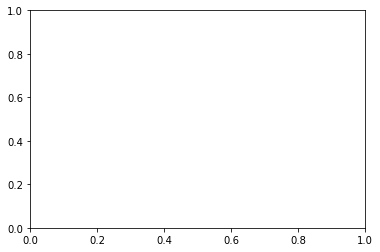

In [19]:
error_fig, error_ax = plt.subplots(1)

error_ax.plot(degree_x, mse_val_y)
error_ax.plot(degree_x, mse_train_y)

# figure config
error_fig.set_size_inches(5.5, 10.5)
error_fig.text(.5, .05, f"Epochs = {epochs}; $\eta$ = {eta}; $\lambda$ = {lam}", ha='center')


# plot config
error_ax.set_title(f"Degree vs. Mean Squared Error (MSE)")
error_ax.set_ylabel("MSE")
error_ax.set_xlabel("Degree (r)")
error_ax.legend(["validation error", "training error"])
error_ax.set_xticks(degree_x)
error_ax.set_xticklabels(degree_x, fontsize=12)


plt.show()